
# Modulo 2 Unidad 1 Grupo 6

## 515K Hotel Reviews Data in Europe

### Etapa 1: Entendimiento de los datos
Debido a que hay muchos datos faltantes la primera parte del entendimiento de datos se dedicara a arreglar esto.

##Integrantes:
Francisco Suarez


In [1]:
! pip install kaggle
import os
filename = "/root/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)
!echo '{"username":"franciscosuarezr","key":"efc1eaa4134569b6b788a52924f32990"}' > /root/.kaggle/kaggle.json
!kaggle datasets download -d jiashenliu/515k-hotel-reviews-data-in-europe
!unzip 515k-hotel-reviews-data-in-europe.zip
!ls

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 73% 33.0M/45.1M [00:00<00:00, 113MB/s] 
100% 45.1M/45.1M [00:00<00:00, 119MB/s]
Archive:  515k-hotel-reviews-data-in-europe.zip
  inflating: Hotel_Reviews.csv       
515k-hotel-reviews-data-in-europe.zip  Hotel_Reviews.csv  sample_data


In [2]:
# Carga de librerías y lectura del archivo que contiene los datos

import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import nltk
from nltk.tokenize import WordPunctTokenizer
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer


data = pd.read_csv("Hotel_Reviews.csv")

# filter out any rows that have more than 13 attributes
#data = data[data.apply(lambda x: len(x) == 13, axis=1)]
#data.columns = ['Hotel_Address', 'Review_Date', 'Average_Score', 'Hotel_Name', 'Reviewer_Nationality', 'Negative_Review', 'Review_Total_Negative_Word_Counts', 'Positive_Review', 'Review_Total_Positive_Word_Counts', 'Reviewer_Score', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Total_Number_of_Reviews', 'Tags', 'Additional_Number_of_Scoring', 'lat', 'lng']

# La columna llamada binaryClass es el atributo a predecir

dataOrginal = data
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


Attribute Information:

first three columns are B,G,R (x1,x2, and x3 features) values and fourth column is of the class labels (decision variable y)

In [3]:
#Cuál es el número de registros?
#Cuál es el número de atributos?

shape = data.shape
shape

(515738, 17)

In [4]:
data.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [5]:
data = data.drop('lat',axis=1)
data = data.drop('lng',axis=1)
shape = data.shape
shape

(515738, 15)

In [6]:
#Cual es el tipo de los atributos?
data.dtypes

Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
Tags                                           object
days_since_review                              object
dtype: object

In [7]:
data["days_since_review"] = pd.Series(data["days_since_review"]).str.extract('(\d+)', expand=False).astype(int)

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data["Review_Date"] = pd.to_datetime(data["Review_Date"]).apply(lambda x: x.timestamp())
data["Review_Date"]

0         1.501718e+09
1         1.501718e+09
2         1.501459e+09
3         1.501459e+09
4         1.500854e+09
              ...     
515733    1.440893e+09
515734    1.440202e+09
515735    1.439942e+09
515736    1.439770e+09
515737    1.439078e+09
Name: Review_Date, Length: 515212, dtype: float64

In [10]:
data.dtypes

Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                   float64
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
Tags                                           object
days_since_review                               int64
dtype: object

In [11]:
data2 = pd.DataFrame()
data2["review"] = data["Negative_Review"] + data["Positive_Review"]

In [12]:
data2["review"] = data2["review"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))

In [13]:
"""data2["review"] = data2["review"].apply(lambda x: WordPunctTokenizer().tokenize(x))"""
#stopwords.words('english')

'data2["review"] = data2["review"].apply(lambda x: WordPunctTokenizer().tokenize(x))'

In [14]:
negation_dict = {
    "aren't": 'are not',
    "aren": 'are not',
    "can't": 'can not',
    "couldn": 'could not',
    "couldn't": 'could not',
    "didn": 'did not',
    "didn't": 'did not',
    'doesn': 'does not',
    "doesn't": 'does not',
    'don': 'do not',
    "don't": 'do not',
    'hadn':'had not',
    "hadn't": 'had not',
    'mightn': 'might not',
    "mightn't": 'might not',
    'haven':'have not',
    "haven't": 'have not',
    'isn':'is not',
    "isn't": 'is not',
    'hasn':'has not',
    "hasn't":'has not',
    'wouldn':'would not',
    "wouldn't": 'would not',
    "won't":'will not',
    'weren':'were not',
    "weren't":'were not',
    'wasn':'was not',
    "wasn't": 'was not',
    'shouldn': 'should not',
    "shouldn't": 'should not',
    'needn': 'need not',
    "needn't":'need not',
    'mustn': 'must not',
    "mustn't": 'must not'
}
neg_pattern = re.compile(r'\b(' + '|'.join(negation_dict.keys()) + r')\b')

In [15]:
def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split()]
    # remove words that contain numbers
    text = [word for word in text if re.search(string=word, pattern=r'[0-9]') is None]
    text = ' '.join(text)
    # convert negation words
    text = neg_pattern.sub(lambda x: negation_dict[x.group()], text)
    text = re.sub(r'[^a-zA-z0-9]',' ',text)
    text = text.split()
    # remove stop words
    text = [x for x in text if x not in stopwords.words('english')]
    # remove empty tokens
    text = [t for t in text if len(t) > 1]
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(i) for i in text]
    vowels = 'aeiou'
    text = [word for word in text if re.search(r'^(?!.*([a-z])\1\1)[aeiou]', word)]

    # join all
    text = " ".join(text)
    return(text)
    negation_dict

In [16]:
data2["review"] = data2["review"].apply(lambda x: clean_text(x))
"""for i in range(len(data["review"])):
  data["review"][i] = clean_text(data["review"][i])"""

'for i in range(len(data["review"])):\n  data["review"][i] = clean_text(data["review"][i])'

In [17]:
data["review"] = data2["review"]
data["review"]

0         angry available use one upon arrival ok intima...
1         amenity upon offer upon original one excellent...
2                               elderly ask inside empty ok
3         afraid attacked angry occurrence amsterdam als...
4         arrived advertising extreamly especially using...
                                ...                        
515733                                                     
515734                                           ok earlier
515735                                       ac useless air
515736                                             enormous
515737                                                     
Name: review, Length: 515212, dtype: object

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_df=0.8, max_features=20000, ngram_range=(1,3))
X = vectorizer.fit_transform(data["review"])

In [19]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
feature_names=vectorizer.get_feature_names_out()

In [20]:
len(feature_names)

20000

In [21]:
X

<515212x20000 sparse matrix of type '<class 'numpy.int64'>'
	with 1803402 stored elements in Compressed Sparse Row format>

In [22]:
data.shape

(515212, 16)

In [23]:
data = data.drop('Hotel_Address',axis=1)
data = data.drop('Hotel_Name',axis=1)
data = data.drop('Reviewer_Nationality',axis=1)
data = data.drop('Negative_Review',axis=1)
data = data.drop('Positive_Review',axis=1)
data = data.drop('Tags',axis=1)
shape = data.shape
shape

(515212, 10)

In [24]:
data.dtypes

Additional_Number_of_Scoring                    int64
Review_Date                                   float64
Average_Score                                 float64
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
days_since_review                               int64
review                                         object
dtype: object

In [25]:
cols = data.columns[data.dtypes.eq('object')]
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')
data.dtypes

Additional_Number_of_Scoring                    int64
Review_Date                                   float64
Average_Score                                 float64
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
days_since_review                               int64
review                                        float64
dtype: object

In [26]:
#Medida de centralidad y desviación para atributos numéricos:
data.describe()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,Additional_Number_of_Scoring,Review_Date,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,days_since_review,review
count,515212.000000,5.152120e+05,515212.000000,515212.000000,515212.000000,515212.000000,515212.000000,515212.000000,515212.000000,6.0
mean,498.416021,1.471098e+09,8.397767,18.540822,2744.698889,17.778256,7.164895,8.395532,354.400474,inf
std,500.668595,1.804973e+07,0.547952,29.693991,2318.090821,21.804541,11.039354,1.637467,208.908943,NaN
min,1.000000,1.438646e+09,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,0.000000,inf
25%,169.000000,1.456186e+09,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,175.000000,NaN
50%,342.000000,1.471219e+09,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,353.000000,NaN
75%,660.000000,1.486598e+09,8.800000,23.000000,3633.000000,22.000000,8.000000,9.600000,527.000000,NaN
max,2682.000000,1.501718e+09,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,730.000000,inf


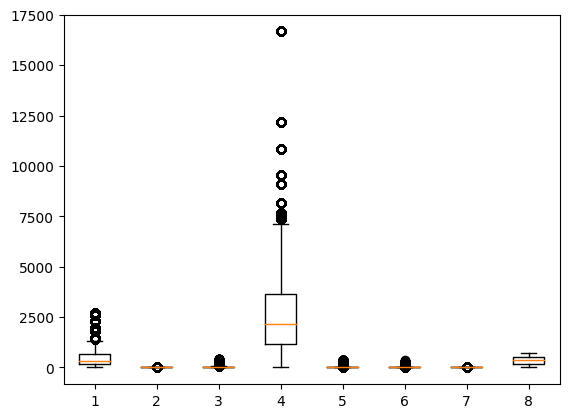

In [27]:
# Diagrama de cajas y bigotes para atributos numéricos
plt.boxplot((data['Additional_Number_of_Scoring'],data['Average_Score'],data['Review_Total_Negative_Word_Counts'],data['Total_Number_of_Reviews'],data['Review_Total_Positive_Word_Counts'],data['Total_Number_of_Reviews_Reviewer_Has_Given'],data['Reviewer_Score'],data['days_since_review']))
plt.show()

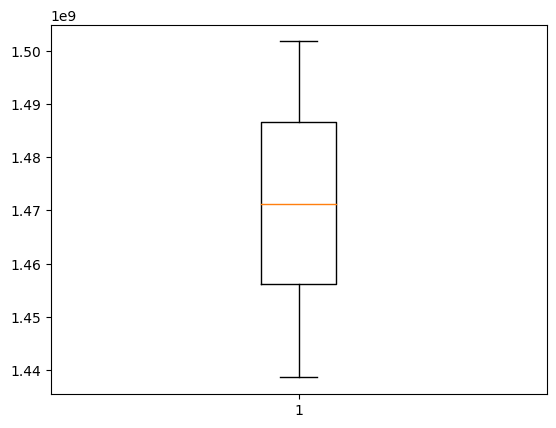

In [28]:
plt.boxplot((data['Review_Date']))
plt.show()

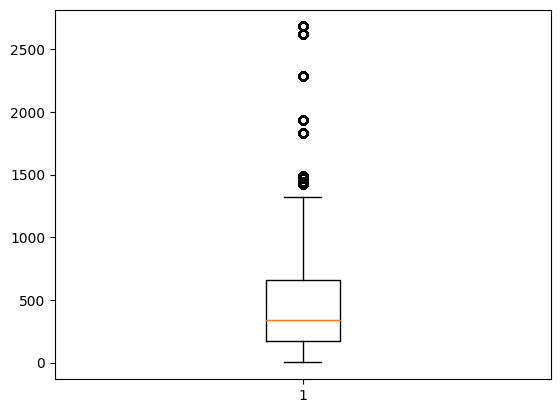

In [29]:
plt.boxplot((data['Additional_Number_of_Scoring']))
plt.show()

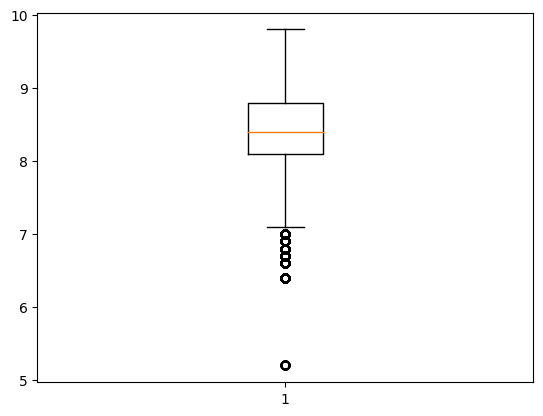

In [30]:
plt.boxplot((data['Average_Score']))
plt.show()

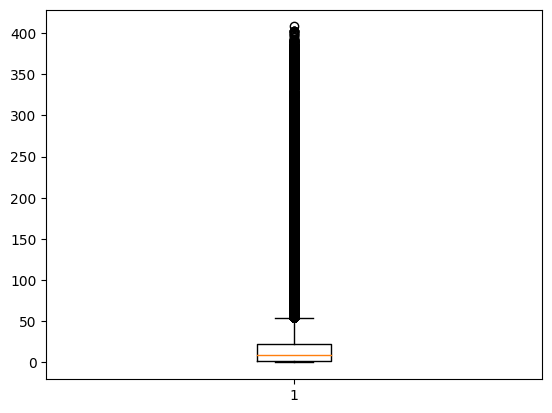

In [31]:
plt.boxplot((data['Review_Total_Negative_Word_Counts']))
plt.show()

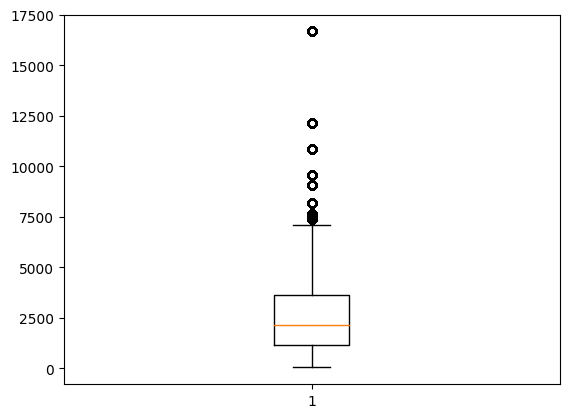

In [32]:
plt.boxplot((data['Total_Number_of_Reviews']))
plt.show()

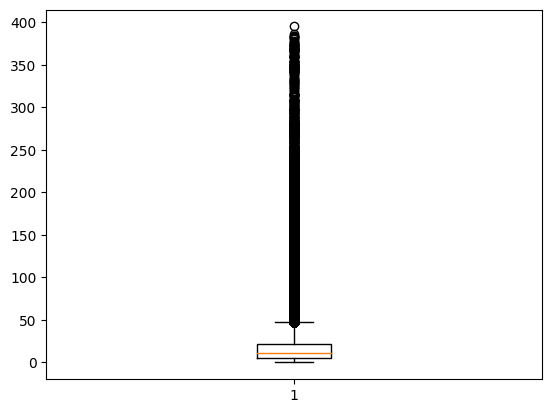

In [33]:
plt.boxplot((data['Review_Total_Positive_Word_Counts']))
plt.show()

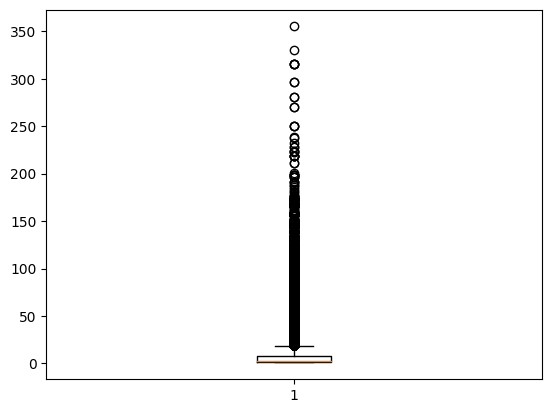

In [34]:
plt.boxplot((data['Total_Number_of_Reviews_Reviewer_Has_Given']))
plt.show()

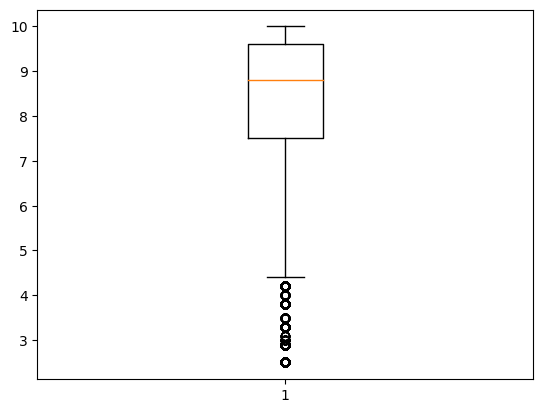

In [35]:
plt.boxplot((data['Reviewer_Score']))
plt.show()

In [36]:
#Medida de centralidad para atributos categóricos:
data.mode()

,Additional_Number_of_Scoring,Review_Date,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,days_since_review,review
0,2682,1.501632e+09,8.4,0,9086,0,1,10.0,1,inf


<Axes: >

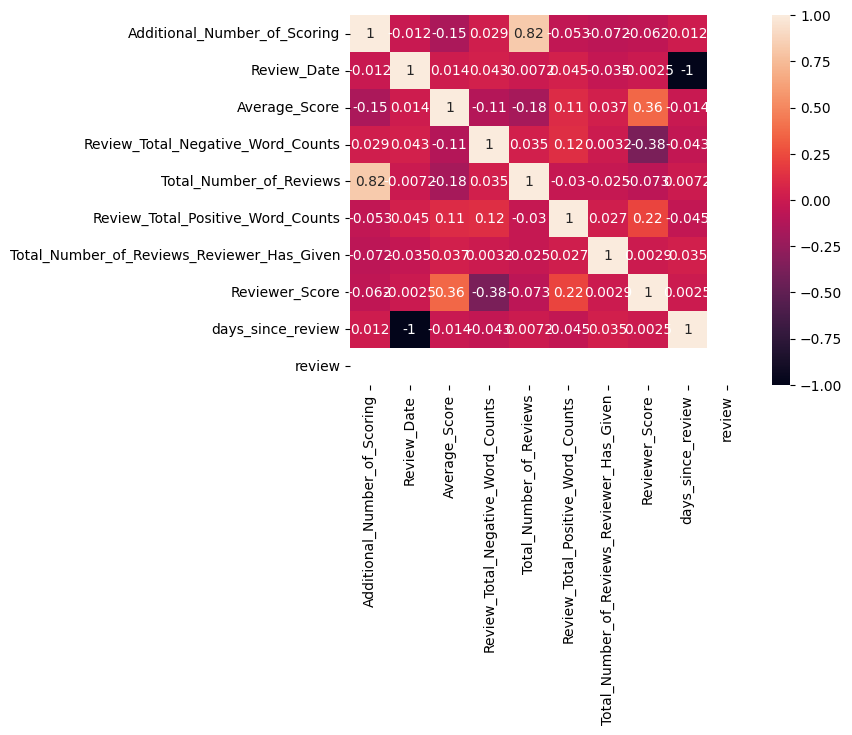

In [37]:
# Correlación entre los atributos de entrada numéricos
# Permite detectar si hay atributos redundantes (correlación mayor a 0.85 o menor a -0.85)

sns.heatmap(data.corr(), annot=True)

In [38]:
#data = data.drop('',axis=1)
data.corr()

,Additional_Number_of_Scoring,Review_Date,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,days_since_review,review
Additional_Number_of_Scoring,1.000000,-0.011967,-0.153233,0.029177,0.824896,-0.053159,-0.071982,-0.061755,0.011967,NaN
Review_Date,-0.011967,1.000000,0.014018,0.043217,-0.007250,0.045059,-0.035124,-0.002485,-1.000000,NaN
Average_Score,-0.153233,0.014018,1.000000,-0.112351,-0.179681,0.106639,0.036514,0.364175,-0.014018,NaN
Review_Total_Negative_Word_Counts,0.029177,0.043217,-0.112351,1.000000,0.035095,0.119693,0.003211,-0.382552,-0.043217,NaN
Total_Number_of_Reviews,0.824896,-0.007250,-0.179681,0.035095,1.000000,-0.030140,-0.024919,-0.072920,0.007250,NaN
Review_Total_Positive_Word_Counts,-0.053159,0.045059,0.106639,0.119693,-0.030140,1.000000,0.026572,0.220709,-0.045059,NaN
Total_Number_of_Reviews_Reviewer_Has_Given,-0.071982,-0.035124,0.036514,0.003211,-0.024919,0.026572,1.000000,0.002885,0.035124,NaN
Reviewer_Score,-0.061755,-0.002485,0.364175,-0.382552,-0.072920,0.220709,0.002885,1.000000,0.002485,NaN
days_since_review,0.011967,-1.000000,-0.014018,-0.043217,0.007250,-0.045059,0.035124,0.002485,1.000000,NaN
review,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
data = data.drop('Review_Date',axis=1)
shape = data.shape
shape

(515212, 9)

In [40]:
# Cual es el máximo de datos faltantes en un mismo registro?
# Si hay registros a los que les faltan muchos valores, es mejor eliminarlos.
max(data.isnull().sum(axis=1))

1

In [41]:
#Cuantos registros hay por cada clase? es decir, por cada valor del atributo de salida?

print(data['Reviewer_Score'].value_counts())

10.0    115758
9.6      71110
9.2      58526
8.8      46386
8.3      41090
7.5      34831
7.9      33062
7.1      24837
6.7      18765
6.3      14909
5.8      12014
5.4       9518
5.0       8408
4.6       6226
4.2       5089
3.8       4035
3.3       2765
2.5       2192
2.9       1583
9.5        724
9.0        646
8.5        508
8.0        505
7.0        410
6.5        345
6.0        253
5.5        227
4.5        122
4.0         84
3.5         79
9.4         63
8.1         39
3.0         37
6.9         29
5.6         17
4.4         12
3.1          8
Name: Reviewer_Score, dtype: int64


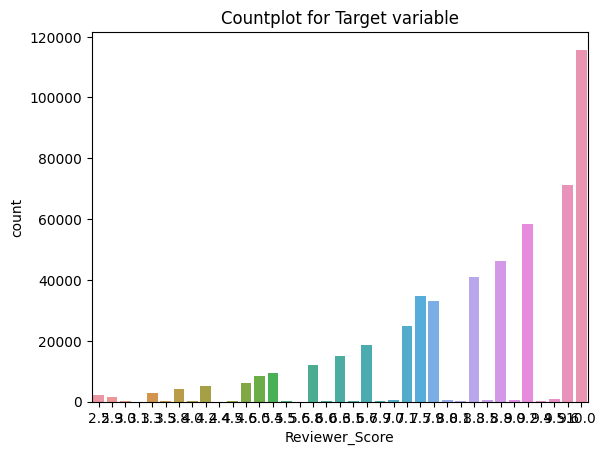

In [42]:
sns.countplot(x='Reviewer_Score',data=data)
plt.title("Countplot for Target variable");

In [43]:
! pip install fastcluster
import fastcluster

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-44-dfb9bc52a7a2>:2: UserWarning: The palette list has more values (50) than needed (37), which may not be intended.
  sns.scatterplot(x='Average_Score',y='Review_Total_Negative_Word_Counts',hue='Reviewer_Score',palette=sns.color_palette("hls",50),data=data,
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


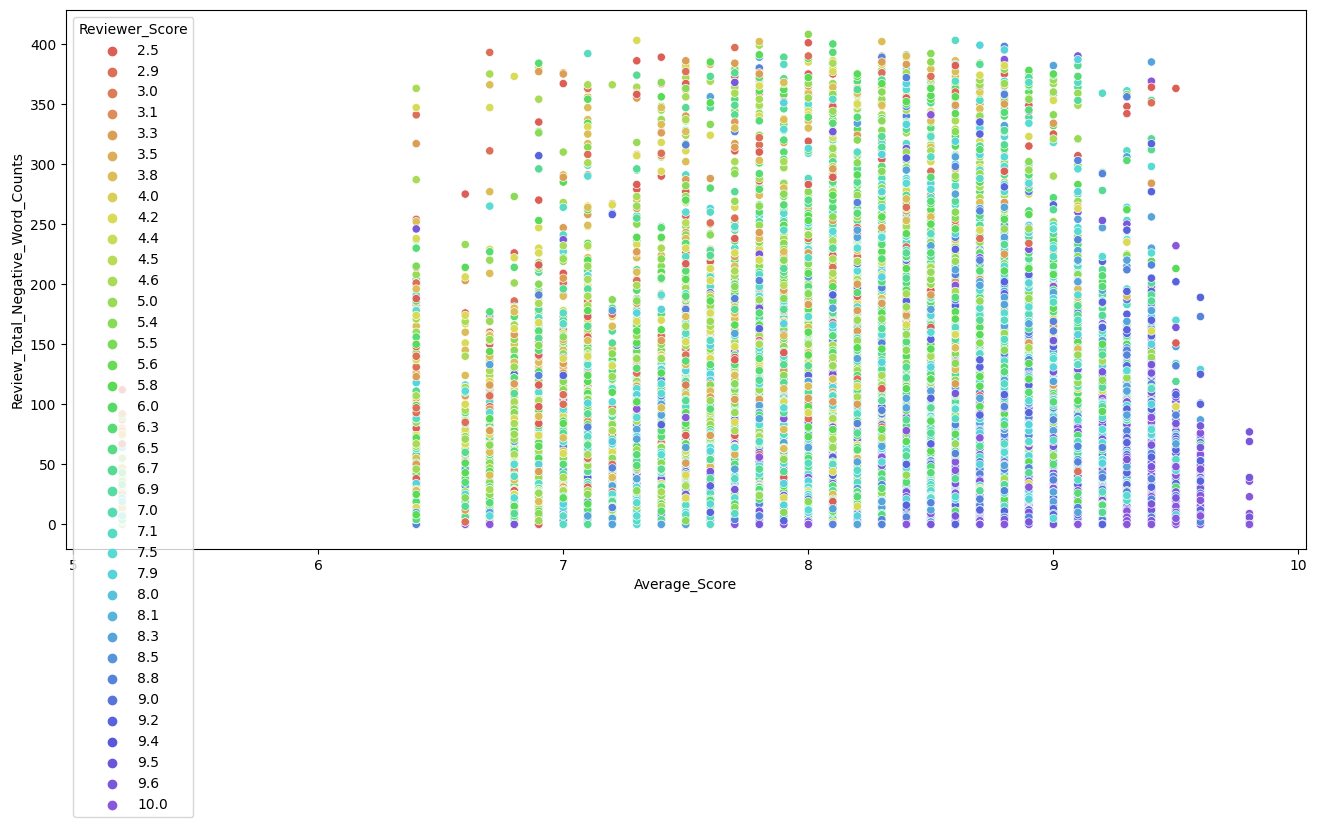

In [44]:
plt.figure(figsize=(16,7))
sns.scatterplot(x='Average_Score',y='Review_Total_Negative_Word_Counts',hue='Reviewer_Score',palette=sns.color_palette("hls",50),data=data,
               legend="full")
plt.show()

## Etapa 3: Modelado
Se crean 3 modelos, Logistic Regression y Support Vector Machine

In [45]:
from scipy.sparse import hstack
import scipy as sp

numeric_data = data[['Additional_Number_of_Scoring', 'Average_Score', 'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews', 'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'days_since_review']].values
numeric_data_sparse = sp.sparse.csr_matrix(numeric_data)

combined_data_sparse = hstack((X, numeric_data_sparse))

In [46]:
cols = data.columns[data.dtypes.eq('object')]
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')
data.dtypes

Additional_Number_of_Scoring                    int64
Average_Score                                 float64
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
days_since_review                               int64
review                                        float64
dtype: object

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


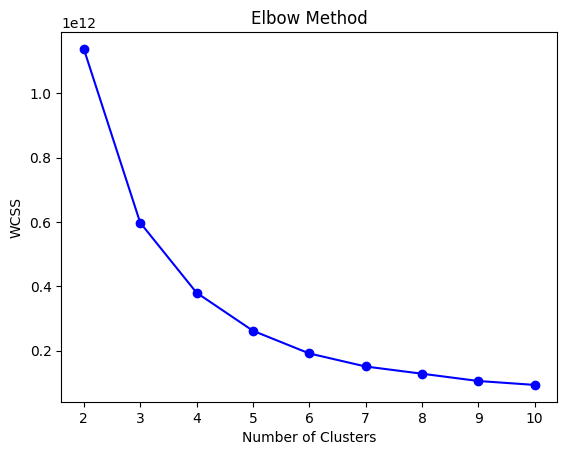

In [47]:
from sklearn.cluster import KMeans

k_values = range(2, 11)

# Initialize a list to store the WCSS values
wcss = []

# Iterate over each value of k
for k in k_values:
    # Create a KMeans object with the current number of clusters
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Fit the KMeans model to the data
    kmeans.fit(combined_data_sparse)

    # Append the WCSS value to the list
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(k_values, wcss, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [48]:
# Specify the number of clusters
num_clusters = 7

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(combined_data_sparse)

# Get the cluster labels for the data points
cluster_labels = kmeans.labels_

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

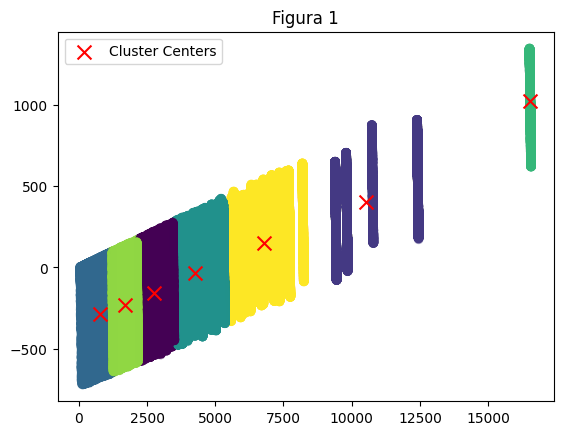

In [49]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# Assuming you have already performed K-means clustering and stored the results in the 'kmeans' object

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Reduce the dimensions using TruncatedSVD
svd = TruncatedSVD(n_components=2)
reduced_data = svd.fit_transform(combined_data_sparse)

# Plot the reduced data points
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)

# Plot the cluster centers
cluster_centers_reduced = svd.transform(cluster_centers)
plt.scatter(cluster_centers_reduced[:, 0], cluster_centers_reduced[:, 1], c='red', marker='x', s=100, label='Cluster Centers')

plt.title('Figura 1')
plt.legend()
plt.show()

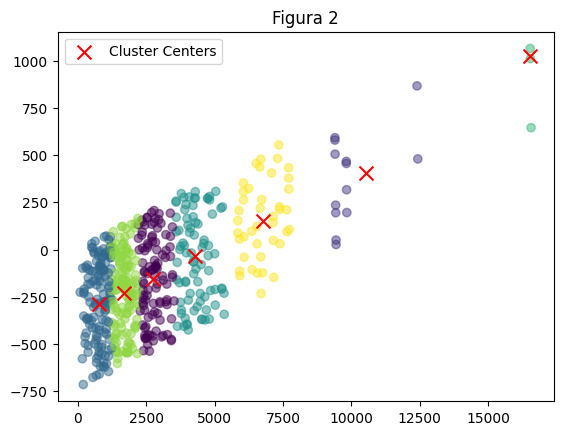

In [50]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
import numpy as np

# Assuming you have already performed K-means clustering and stored the results in the 'kmeans' object

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Reduce the dimensions using TruncatedSVD
svd = TruncatedSVD(n_components=2)
reduced_data = svd.fit_transform(combined_data_sparse)

# Define the percentage of data points to visualize
sample_percentage = 0.001  # Adjust this value as per your requirement

# Randomly sample a subset of data points
num_samples = int(len(reduced_data) * sample_percentage)
random_indices = np.random.choice(len(reduced_data), size=num_samples, replace=False)
sampled_data = reduced_data[random_indices]

# Plot the sampled data points
plt.scatter(sampled_data[:, 0], sampled_data[:, 1], c=cluster_labels[random_indices], cmap='viridis', alpha=0.5)

# Plot the cluster centers
cluster_centers_reduced = svd.transform(cluster_centers)
plt.scatter(cluster_centers_reduced[:, 0], cluster_centers_reduced[:, 1], c='red', marker='x', s=100, label='Cluster Centers')

plt.title('Figura 2')
plt.legend()
plt.show()

#Conclusiones

Logramos separar el dataset en 7 clusters, en la Figura 1 se ven todos los puntos en un plano que representa una reducción de dimensionalidad, esta reducción solo se usó para graficar. Sin embargo, al ser tantos puntos en la primera imagen se ven como bloques, por lo que la Figura 2 sólo muestra el 0.001% de los puntos, esto nos permite observar una nube de puntos más típica.


Por otro lado también podemos ver que elbow method nos marca un buen equilibrio con 7 clusters ya que a partir de 7 empezamos a tener ganancias reducidas.

Sobre el procesamiento de los datos. El enorme tamaño del dataset presentó retos a la hora de filtrar las reseñas, esto se debe a que cargar todas las reseñas en memoria era imposible, ya que supera el límite de RAM de Colab y de mi computador personal (16GB), esto requirió cambiar un poco la técnica usada para poder procesar todos estos datos, ya que al intentar hacer el procesamiento por partes el tiempo de ejecución subió a las horas, lo cual no es útil  en un ciclo de prototipado y pruebas.

También se decidió filtrar las palabras aún más de lo que se recomendó en clase y de lo visto en ejemplos de artículos relacionados. Se decidió eliminar palabras que tuvieran la misma letra 3 veces seguida, ya que en el inglés esto muy rara vez se da, y es muy probable que las palabras que cumplen esta condición sean ruido, tambien se limito el numero de palabras a las 20000 mas usadas, un último reto fue unir la matriz dispersa resultante del procesamiento de las reseñas con el resto del dataset filtrado, sin embargo se descubrió que K-Means funciona bien usando directamente matrices dispersas.


